# READ DATA

In [58]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import operator

## Data.csv

In [15]:
df = pd.read_csv('data/data.csv' , encoding='latin-1')
df = df.drop(columns = 'Unnamed: 0')

In [21]:
df.sample(5)

,day,name,position,position_level,age,age_level,departure_club,departure_league,departure_country,departure_continent,...,market_value_raw,market_value,market_value_update,move_type_raw,move_type,move_value,move_value_updated,move_year,move_month,move_day
14994,2008-07-29,Rodrigo Tabata,Milieu offensif,Middle line,27.0,26 - 30,Santos FC,Campeonato Brasileiro Série A,BR,SA,...,"1,00 mio. ",1000.0,865.0,Transfert libre,Transfert,0.0,0.0,2008,7,29
91828,2014-10-31,Islam Nabil,Milieu offensif,Middle line,24.0,18 - 25,Gaish,Egyptian Premier League,EG,AF,...,100 K ,100.0,79.0,?,NaN,NaN,NaN,2014,10,31
116473,2015-08-31,Ugur Tülümen,Avant centre,Offensive line,29.0,26 - 30,Amed SK,2.Lig Kirmizi,TR,EU,...,50 K ,50.0,39.0,Transfert libre,Transfert,0.0,0.0,2015,8,31
120026,2015-12-05,Francesco Rotunno,Ailier gauche,Offensive line,19.0,18 - 25,Bisceglie,Serie D - H,IT,EU,...,-,NaN,NaN,Transfert libre,Transfert,0.0,0.0,2015,12,5
48784,2012-12-10,Renan Valentim,Milieu droit,Middle line,20.0,18 - 25,Kazincbarcika,Ness Hungary NB II - Ost,HU,EU,...,50 K ,50.0,41.0,-,End of contract,NaN,NaN,2012,12,10


In [83]:
df.columns

Index(['day', 'name', 'position', 'position_level', 'age', 'age_level',
       'departure_club', 'departure_league', 'departure_country',
       'departure_continent', 'arrival_club', 'arrival_league',
       'arrival_country', 'arrival_continent', 'market_value_raw',
       'market_value', 'market_value_update', 'move_type_raw', 'move_type',
       'move_value', 'move_value_updated', 'move_year', 'move_month',
       'move_day'],
      dtype='object')

# Exploration

## Mean age of transfer

In [16]:
mean_age = []
for i in range( 2001, 2019):
    mean_age.append(df[df.day.str.contains(str(i))].age.mean())


No handles with labels found to put in legend.


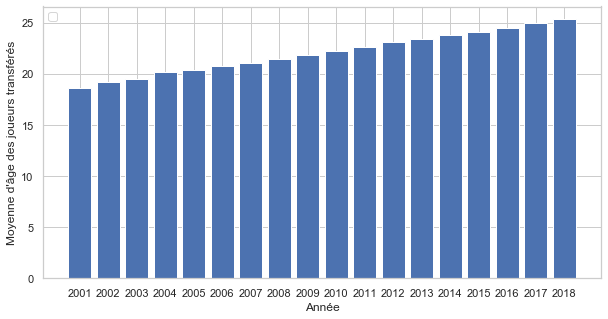

In [78]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(2001,2019),
       height=mean_age)
plt.legend(loc="upper left")
plt.ylabel("Moyenne d'âge des joueurs transférés")
plt.xlabel('Année')
sns.set(style="whitegrid")

ax.set_xticks(range(2001,2019))
plt.show()

## Average price per position

In [60]:
position_list = df.position.unique().tolist()
market_value = {}

for position in position_list:
    market_value[position] = (df[df.position==position].market_value.mean())

In [63]:
sorted_market_value = sorted(market_value.items(),key=operator.itemgetter(1),reverse = True)

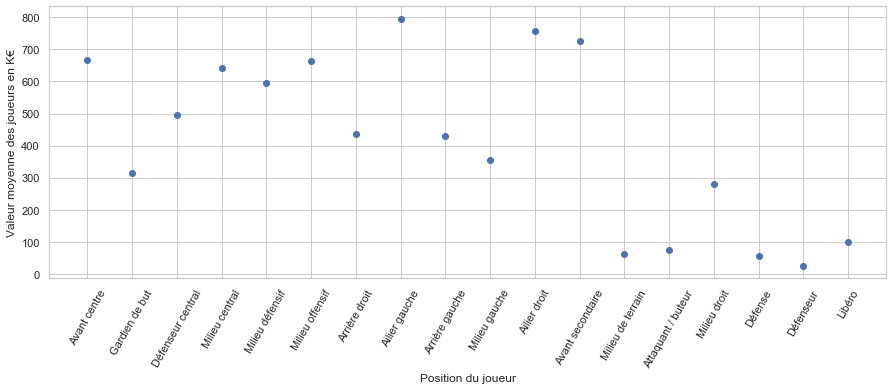

In [75]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(market_value.keys(),market_value.values())
plt.xticks(rotation=60, ha='center')
plt.xlabel("Position du joueur")
plt.ylabel("Valeur moyenne des joueurs en K€")
plt.show()

# Machine Learning Part

## Preprocessing

In [267]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

columns = ['day', 'name', 'position', 'position_level', 'age', 'age_level',
       'departure_club', 'departure_league', 'departure_country',
       'departure_continent', 'arrival_club', 'arrival_league',
       'arrival_country', 'arrival_continent', 'market_value_raw',
       'market_value', 'market_value_update', 'move_type_raw', 'move_type',
       'move_value', 'move_value_updated', 'move_year', 'move_month',
       'move_day']

features = ['day', 'name', 'position', 'position_level', 'age', 'age_level',
       'departure_club', 'departure_league', 'departure_country',
       'departure_continent', 'arrival_club', 'arrival_league',
       'arrival_country', 'arrival_continent', 'move_type_raw', 'move_type',
       'move_value', 'move_value_updated', 'move_year', 'move_month',
       'move_day']

label = ['market_value']



data = df[columns].dropna().reset_index(drop=True)

X = data[features].dropna().reset_index(drop=True)
Y = data[label].dropna().reset_index(drop=True)

categorical_feature_mask = X.dtypes==object
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [268]:
le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].head(10)

,day,name,position,position_level,age_level,departure_club,departure_league,departure_country,departure_continent,arrival_club,arrival_league,arrival_country,arrival_continent,move_type_raw,move_type
0,0,23727,5,2,3,2163,154,34,2,4532,147,33,2,1135,1
1,1,13605,8,0,0,3070,427,139,2,7137,347,112,2,432,1
2,2,24367,8,0,0,2356,234,115,2,6248,227,110,2,630,1
3,3,30554,9,0,0,4218,225,40,2,2484,126,39,2,698,1
4,3,7403,8,0,0,281,332,121,2,2393,371,116,2,1135,1
5,3,32338,5,2,0,4373,224,40,2,1262,218,39,2,1135,1
6,4,18788,5,2,0,6368,224,40,2,1331,126,39,2,1135,1
7,5,17626,0,2,0,2370,224,40,2,6401,96,39,2,1135,1
8,6,5898,13,1,0,5024,99,40,2,1279,219,39,2,1135,1
9,6,32338,5,2,0,1173,224,40,2,3108,126,39,2,1135,1


In [269]:
x_train, x_test = train_test_split(X, test_size=0.2,random_state=42)
y_train, y_test = train_test_split(Y, test_size=0.2,random_state=42)


Coefficients: 
 [[-4.20507917e-01  8.04364845e-04  2.36859058e+00  5.16909559e+01
   6.34610854e+01 -1.50563073e+02 -1.08720413e-02  2.33057084e-01
  -3.07775771e-01 -5.41904275e+01 -9.46347968e-03  2.11784577e-01
  -3.14329093e-01  9.01084059e+01 -4.73478956e-01 -2.75162380e+03
  -7.87300880e-02  9.78695467e-01  1.08999917e+02  1.80584065e+01
   1.57014530e+00]]
Mean squared error: 1755785.68
Coefficient of determination: 0.74


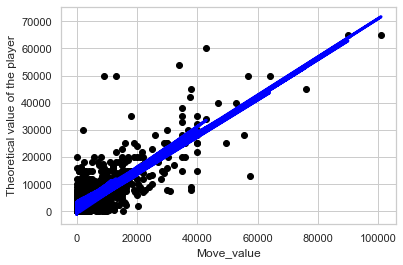

In [287]:

regr = linear_model.LinearRegression()


# fit the model
regr.fit(np.array(x_train), np.array(y_train))

y_pred = regr.predict(np.array(x_test))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(np.array(y_test.values), y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(np.array(y_test), y_pred))

# Plot outputs
plt.scatter(x_test.move_value.values, y_test.values,  color='black')
plt.plot(x_test.move_value.values, y_pred, color='blue', linewidth=3)
plt.xlabel('Move_value')
plt.ylabel('Theoretical value of the player')


plt.show()

In [290]:
pd.DataFrame(y_pred)

,0
0,109.158899
1,733.757394
2,461.502992
3,1769.302251
4,410.056138
...,...
15843,363.858131
15844,831.291639
15845,33.048211
15846,310.203091


In [292]:
pd.DataFrame(x_test)

,day,name,position,position_level,age,age_level,departure_club,departure_league,departure_country,departure_continent,...,arrival_league,arrival_country,arrival_continent,move_type_raw,move_type,move_value,move_value_updated,move_year,move_month,move_day
50554,2463,38159,2,0,22.0,0,852,349,116,2,...,335,81,2,1135,1,0.0,0.0,2017,3,7
73765,3071,29756,5,2,25.0,0,2171,125,39,0,...,122,38,0,215,1,175.0,136.0,2019,1,1
9101,902,32613,14,1,28.0,1,5136,40,5,4,...,38,5,4,1135,1,0.0,0.0,2012,1,12
3377,416,7115,9,0,23.0,0,3150,234,115,2,...,227,110,2,45,1,1500.0,1265.0,2009,7,1
26546,1747,31637,16,1,32.0,2,2310,0,109,2,...,0,104,2,1135,1,0.0,0.0,2015,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78285,3122,29735,16,1,30.0,1,3535,165,58,2,...,156,54,2,1135,1,0.0,0.0,2019,2,21
67678,2921,24546,14,1,24.0,0,5338,358,116,2,...,412,131,2,630,1,500.0,388.0,2018,7,18
66174,2911,22655,8,0,23.0,0,4932,22,41,2,...,21,40,2,1135,1,0.0,0.0,2018,7,8
28945,1832,37286,5,2,24.0,0,6540,282,104,3,...,273,99,3,1135,1,0.0,0.0,2015,4,6
